# DATA SCIENCE INTERN @BHARAT INTERN

### AUTHOR : SIDDHARTH

# TASK 1 : STOCK PREDICTION

## STEP 1 : IMPORTING LIBRARIES AND DATA TO BE USED

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

## STEP 2 : GATHERING INSIGHTS

In [3]:
# shape of data
print("Shape of data:",dataset_train.shape)

Shape of data: (2035, 8)


In [4]:
# statistical description of data
dataset_train.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
# summary of data
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
# checking null values
dataset_train.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

### There are no null values in the dataset

In [8]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


## STEP 3 : DATA PRE-PROCESSING

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
X_train = []
y_train = []

# Loop through your data to create sequences
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

# Convert lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Reshape X_train
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## STEP 4 :  CREATING LSTM MODEL

In [14]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [15]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 12s 76ms/step - loss: 0.0100
Epoch 2/100
62/62 [==============================] - 4s 69ms/step - loss: 0.0034
Epoch 3/100
62/62 [==============================] - 4s 69ms/step - loss: 0.0032
Epoch 4/100
62/62 [==============================] - 4s 71ms/step - loss: 0.0027
Epoch 5/100
62/62 [==============================] - 5s 75ms/step - loss: 0.0025
Epoch 6/100
62/62 [==============================] - 4s 72ms/step - loss: 0.0022
Epoch 7/100
62/62 [==============================] - 4s 71ms/step - loss: 0.0023
Epoch 8/100
62/62 [==============================] - 4s 69ms/step - loss: 0.0020
Epoch 9/100
62/62 [==============================] - 4s 70ms/step - loss: 0.0021
Epoch 10/100
62/62 [==============================] - 4s 69ms/step - loss: 0.0019
Epoch 11/100
62/62 [==============================] - 4s 69ms/step - loss: 0.0017
Epoch 12/100
62/62 [==============================] - 4s 69ms/step - loss: 0.0016
Epoch 13/100
62/62 [====

62/62 [==============================] - 5s 73ms/step - loss: 6.2147e-04
Epoch 99/100
62/62 [==============================] - 4s 72ms/step - loss: 6.0889e-04
Epoch 100/100
62/62 [==============================] - 5s 73ms/step - loss: 5.9294e-04


In [16]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [18]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 1s 1s/step


## STEP 5 :  VISUALIZING ACTUAL VS PREDICTED DATA

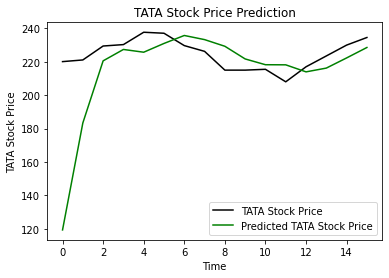

In [20]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

# THANK YOU!